In [66]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.dates as dates
import matplotlib.pyplot as plt

In [67]:
# ou créer une boucle pour importer les fichiers existants 
filenames=['/Users/gunavadh.limfree.fr/Desktop/consultantStocks/CapGem.csv',
           '/Users/gunavadh.limfree.fr/Desktop/consultantStocks/ATO.PA_Atos.csv',
           '/Users/gunavadh.limfree.fr/Desktop/consultantStocks/ACN_Accenture.csv', 
           '/Users/gunavadh.limfree.fr/Desktop/consultantStocks/GIB_CGIgroup.csv', 
           '/Users/gunavadh.limfree.fr/Desktop/consultantStocks/CTSH.MX_Cognizant.csv', 
           '/Users/gunavadh.limfree.fr/Desktop/consultantStocks/IXIC.csv' ]
#boucle
df=[]
for filename in filenames:
    df.append(pd.read_csv(filename, engine='python', sep=None,parse_dates=False, 
                          decimal='.', na_values='n/a', index_col=None))
df[4].info()
df[0].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 7 columns):
Date         890 non-null object
Open         890 non-null float64
High         890 non-null float64
Low          890 non-null float64
Close        890 non-null float64
Adj Close    890 non-null float64
Volume       890 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 48.8+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,258.200012,274.799988,255.899994,255.899994,170.750320,492603.0
1,2000-01-04,257.000000,257.000000,236.600006,237.199997,158.272690,357912.0
2,2000-01-05,229.100006,230.000000,212.000000,213.800003,142.658920,784213.0
3,2000-01-06,218.699997,222.100006,215.000000,215.199997,143.593109,468768.0
4,2000-01-07,213.000000,234.899994,210.100006,226.000000,150.799423,550392.0


In [68]:

#attribuer un nom aux données importées et créer une colonne 'ticker'
capgemini=df[0]
atos=df[1]
accenture=df[2]
CGIgr=df[3]
cognizant=df[4]
nasdaq=df[5]
capgemini.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,258.200012,274.799988,255.899994,255.899994,170.750320,492603.0
1,2000-01-04,257.000000,257.000000,236.600006,237.199997,158.272690,357912.0
2,2000-01-05,229.100006,230.000000,212.000000,213.800003,142.658920,784213.0
3,2000-01-06,218.699997,222.100006,215.000000,215.199997,143.593109,468768.0
4,2000-01-07,213.000000,234.899994,210.100006,226.000000,150.799423,550392.0


In [86]:
#créer une colonne ticker en y intégrant l'acronyme correspondant à chaque société
capgemini['ticker']='Cap.PA'
print(capgemini.head())
atos['ticker']='Ato.PA'
print(atos.head())
accenture['ticker']= 'ACN.NYSE'
CGIgr ['ticker']= 'GIB.TO'
cognizant['ticker']='CTSH.MX'
nasdaq['ticker']='IXIC.US'

         Date        Open        High         Low       Close   Adj Close  \
0  2000-01-03  258.200012  274.799988  255.899994  255.899994  170.750320   
1  2000-01-04  257.000000  257.000000  236.600006  237.199997  158.272690   
2  2000-01-05  229.100006  230.000000  212.000000  213.800003  142.658920   
3  2000-01-06  218.699997  222.100006  215.000000  215.199997  143.593109   
4  2000-01-07  213.000000  234.899994  210.100006  226.000000  150.799423   

     Volume  ticker  
0  492603.0  Cap.PA  
1  357912.0  Cap.PA  
2  784213.0  Cap.PA  
3  468768.0  Cap.PA  
4  550392.0  Cap.PA  
         Date        Open        High         Low       Close   Adj Close  \
0  2000-01-03  167.100006  182.000000  167.000000  172.800003  152.969620   
1  2000-01-04  175.199997  178.000000  159.199997  162.399994  143.763107   
2  2000-01-05  156.500000  157.500000  148.899994  148.899994  131.812363   
3  2000-01-06  149.000000  155.600006  145.100006  149.000000  131.900879   
4  2000-01-07  152.0

In [70]:
#créer une seule base de données ”consultStocks”
stocks_list=[capgemini, atos, accenture, CGIgr]
consultStocks=pd.concat(stocks_list,sort='ticker')

#description de la BD consultStocks
consultStocks.info()
print(consultStocks.tail())
print(consultStocks.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19331 entries, 0 to 5119
Data columns (total 8 columns):
Adj Close    19292 non-null float64
Close        19292 non-null float64
Date         19331 non-null object
High         19292 non-null float64
Low          19292 non-null float64
Open         19292 non-null float64
Volume       19292 non-null float64
ticker       19331 non-null object
dtypes: float64(6), object(2)
memory usage: 1.3+ MB
      Adj Close      Close        Date       High        Low       Open  \
5115  66.860001  66.860001  2019-02-06  67.430000  66.540001  67.209999   
5116  66.639999  66.639999  2019-02-07  66.940002  65.980003  66.599998   
5117  67.260002  67.260002  2019-02-08  67.269997  66.389999  66.440002   
5118  66.349998  66.349998  2019-02-11  67.379997  66.260002  67.099998   
5119  66.599998  66.599998  2019-02-12  66.870003  65.800003  66.680000   

        Volume  ticker  
5115  231000.0  GIB.TO  
5116  210100.0  GIB.TO  
5117  213900.0  GIB.TO  
5118

In [71]:

#restreindre aux colonnes 'ticker', 'Adj Close' et 'Volume'
consultStocks_restraint= consultStocks[['Date','ticker','Adj Close']]

#voir les 5 dernières ligne de la BD
print(consultStocks_restraint.head())
print(consultStocks_restraint.tail())

         Date  ticker   Adj Close
0  2000-01-03  Cap.PA  170.750320
1  2000-01-04  Cap.PA  158.272690
2  2000-01-05  Cap.PA  142.658920
3  2000-01-06  Cap.PA  143.593109
4  2000-01-07  Cap.PA  150.799423
            Date  ticker  Adj Close
5115  2019-02-06  GIB.TO  66.860001
5116  2019-02-07  GIB.TO  66.639999
5117  2019-02-08  GIB.TO  67.260002
5118  2019-02-11  GIB.TO  66.349998
5119  2019-02-12  GIB.TO  66.599998


In [120]:

#indexer les colonnes Date et ticker pour calculer la variation sur la colonne Adj Close seule
consultStocks_index=consultStocks_restraint.set_index(['Date', 'ticker'])
print(consultStocks_index.tail())

#compter les données qui sont vides 
print(" non renseigné sur la colonne Adj Close est de 39")
consultStocks_index.isnull().sum()

#renseigner les données Null 
consultStocks_index.bfill().ffill()

                   Adj Close
Date       ticker           
2019-02-06 GIB.TO  66.860001
2019-02-07 GIB.TO  66.639999
2019-02-08 GIB.TO  67.260002
2019-02-11 GIB.TO  66.349998
2019-02-12 GIB.TO  66.599998
 non renseigné sur la colonne Adj Close est de 39


,,Adj Close
Date,ticker,
2000-01-03,Cap.PA,170.750320
2000-01-04,Cap.PA,158.272690
2000-01-05,Cap.PA,142.658920
2000-01-06,Cap.PA,143.593109
2000-01-07,Cap.PA,150.799423
2000-01-10,Cap.PA,160.207687
2000-01-11,Cap.PA,173.486069
2000-01-12,Cap.PA,166.813553
2000-01-13,Cap.PA,161.608948


In [168]:
#faire pivoter les colonnes
consultStocks_graph=consultStocks_restraint.pivot('Date','ticker','Adj Close')
#consultStocks_graph=consultStocks_graph.bfill().ffill()

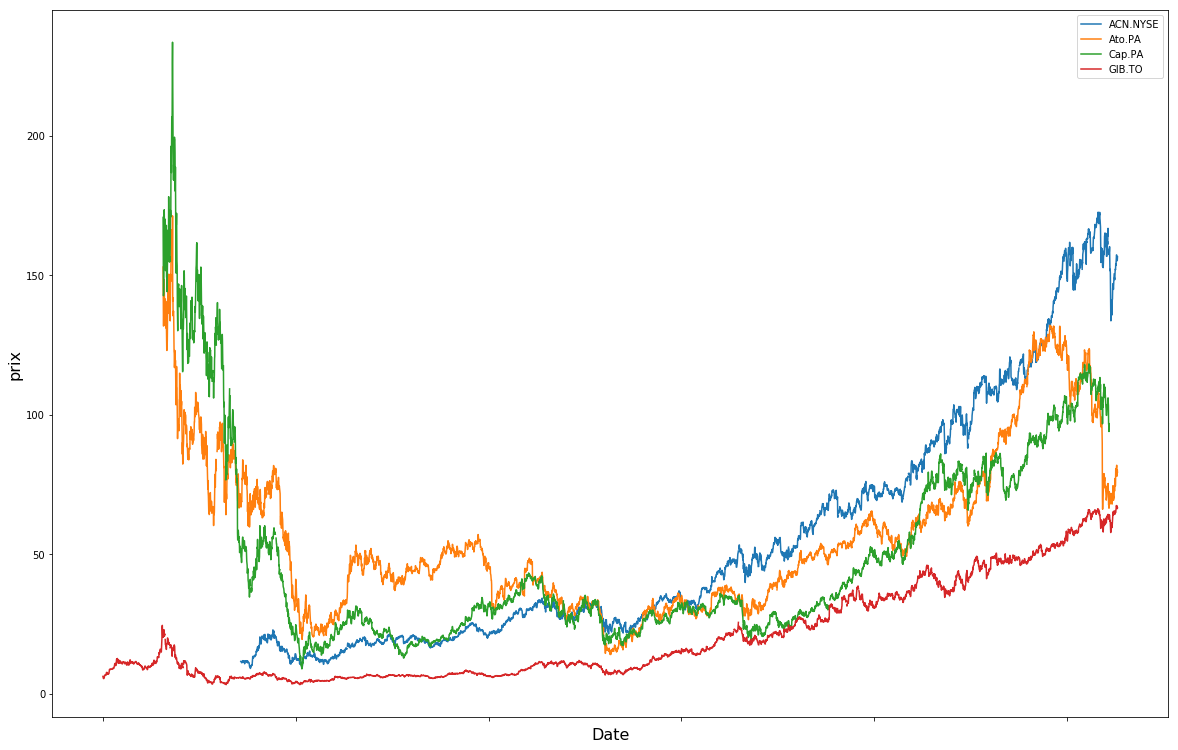

In [169]:

#créer une représentation linéaire des cours de chaque société
ax=consultStocks_graph.plot(kind='line', figsize=(20,13))
plt.legend(fontsize=10) 
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('prix', fontsize=16)

plt.show()

Les prix de ces actions semblent être corrélés au regard de ce graphique.
Cependant, grâce à la réprésentation par heatmap de Seaborn nous pouvons encore mieux représenter ces corrélations. L'évolution des prix de CGI et Accenture sont presque parfaitement corrélés que ce soit par la méthode de rang Spearman ou la méthode classique de Pearson.



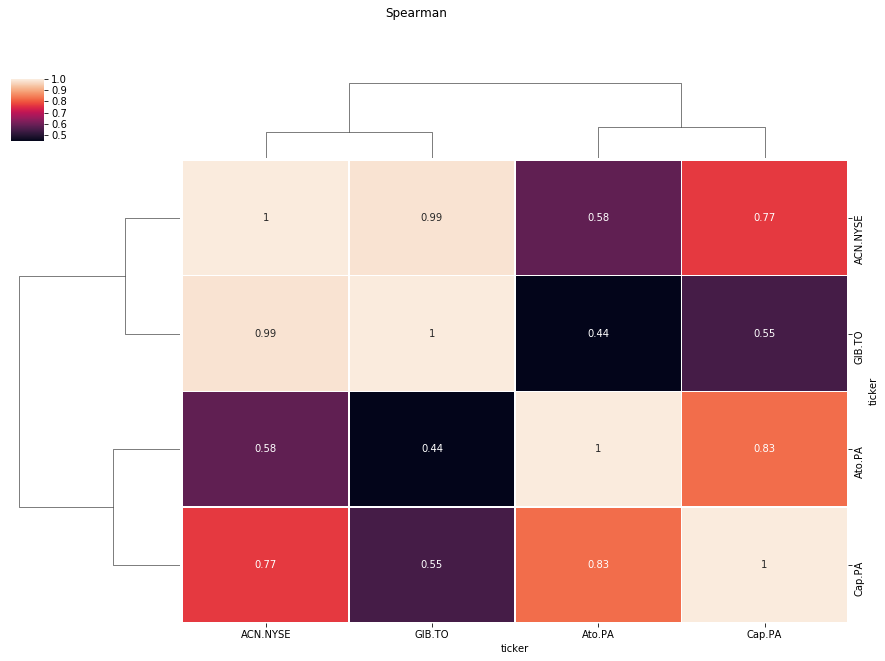

ticker    ACN.NYSE    Ato.PA    Cap.PA    GIB.TO
ticker                                          
ACN.NYSE  1.000000  0.582982  0.771834  0.987845
Ato.PA    0.582982  1.000000  0.830362  0.444623
Cap.PA    0.771834  0.830362  1.000000  0.545076
GIB.TO    0.987845  0.444623  0.545076  1.000000
remarquer la corrélation presque parfaite entre Accenture et CGI group


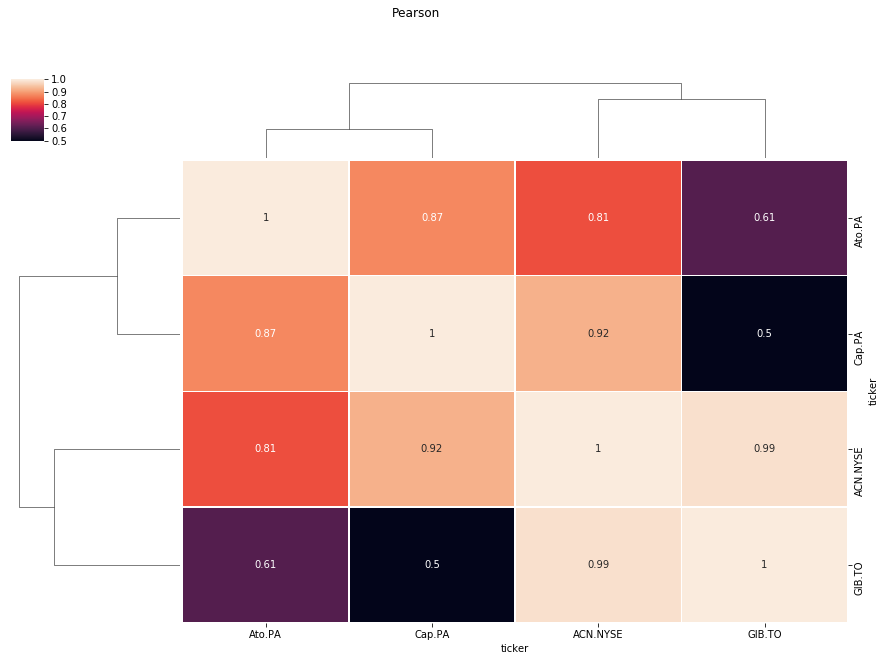

ticker    ACN.NYSE    Ato.PA    Cap.PA    GIB.TO
ticker                                          
ACN.NYSE  1.000000  0.814019  0.924900  0.986261
Ato.PA    0.814019  1.000000  0.874728  0.608956
Cap.PA    0.924900  0.874728  1.000000  0.498448
GIB.TO    0.986261  0.608956  0.498448  1.000000


In [183]:
#importer la bibliothèque seaborn
import seaborn as sns

#créer une matrice de corrélation de type Spearman (rang)
consultStocks_corr = consultStocks_graph.corr(method='spearman')


# représenter la matrice en graphique type 'heatmap'
graph = sns.clustermap(consultStocks_corr, annot=True, annot_kws={"size": 10}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
graph.fig.suptitle('Spearman')
plt.show()
print(consultStocks_corr)
print("remarquer la corrélation presque parfaite entre Accenture et CGI group")

#créer une matrice de corrélation de type Pearson (rang)
consultStocks_corr = consultStocks_graph.corr(method='pearson')


# représenter la matrice en graphique type 'heatmap'
graph = sns.clustermap(consultStocks_corr, annot=True, annot_kws={"size": 10}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
graph.fig.suptitle('Pearson')
plt.show()
print(consultStocks_corr)

Cependant, si nous ajoutons à ces cours, l'indice Nasdaq et l'action Cognizant alors la representation la corrélation de l'évolution des prix devient moins évidente visuellement.

In [172]:
#ajouter le Nasdaq et l'action Cognizant
stocks_list1=[capgemini, atos, accenture, CGIgr, nasdaq, cognizant]
consultStocks1=pd.concat(stocks_list1,sort='ticker')

#description de la BD consultStocks
consultStocks1.info()
consultStocks1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32335 entries, 0 to 889
Data columns (total 8 columns):
Adj Close    32296 non-null float64
Close        32296 non-null float64
Date         32335 non-null object
High         32296 non-null float64
Low          32296 non-null float64
Open         32296 non-null float64
Volume       32296 non-null float64
ticker       32335 non-null object
dtypes: float64(6), object(2)
memory usage: 2.2+ MB


Adj Close    39
Close        39
Date          0
High         39
Low          39
Open         39
Volume       39
ticker        0
dtype: int64

In [154]:
#restreindre aux colonnes 'ticker', 'Adj Close' et 'Volume'
consultStocks_restraint1= consultStocks1[['Date','ticker','Adj Close']]

#indexer les colonnes Date et ticker pour calculer la variation sur la colonne Adj Close seule
consultStocks_index1=consultStocks_restraint1.set_index(['Date', 'ticker'])

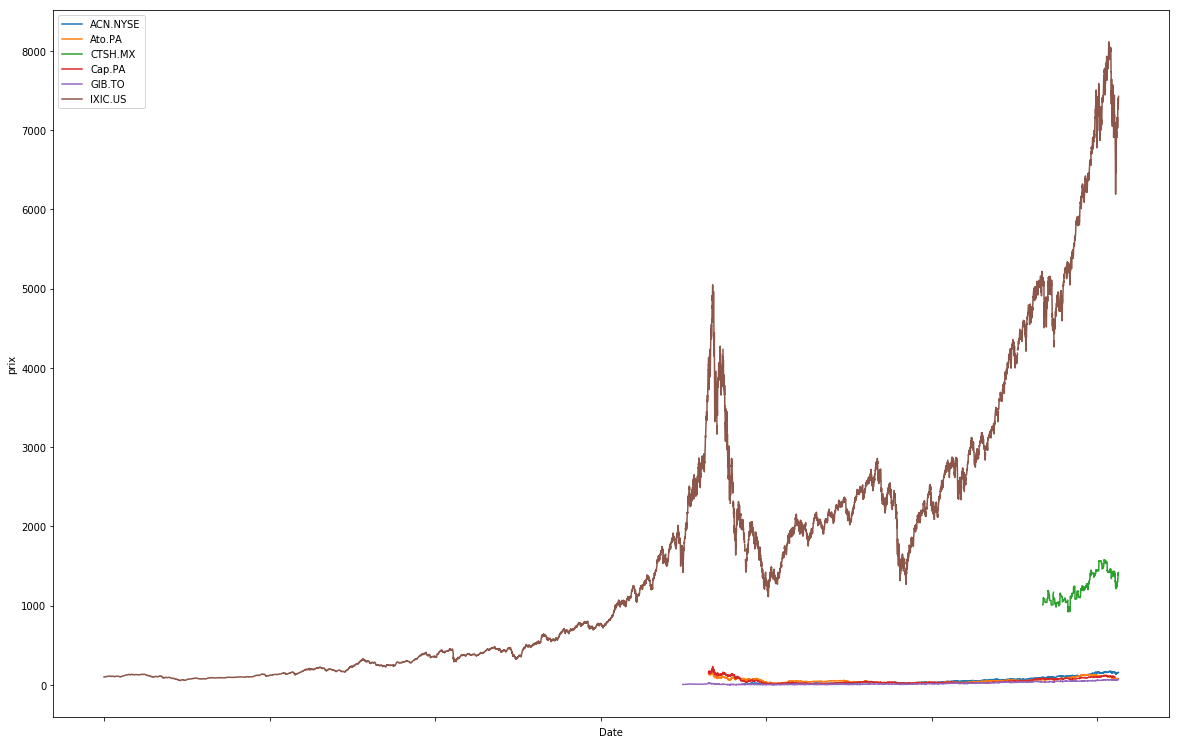

In [166]:
#faire pivoter les colonnes et renseigner les NA
consultStocks_graph1=consultStocks_restraint1.pivot('Date','ticker','Adj Close')

#consultStocks_graph1=consultStocks_graph1.ffill().bfill()

#créer une représentation linéaire des cours de chaque société
ax=consultStocks_graph1.plot(kind='line',figsize=(20,13))
plt.legend(fontsize=10) 
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('prix', fontsize=10)


plt.show()

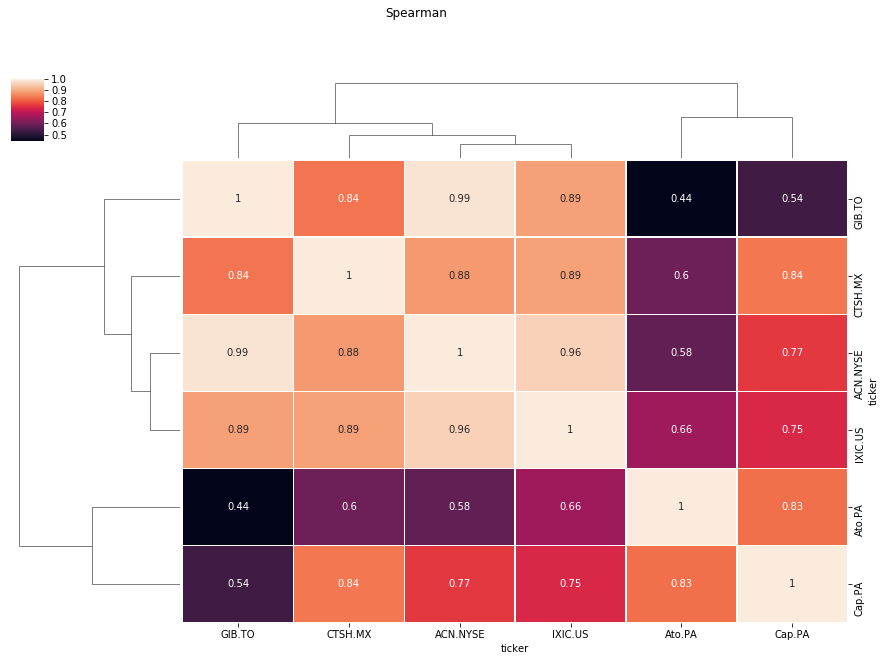

ticker    ACN.NYSE    Ato.PA    Cap.PA    GIB.TO
ticker                                          
ACN.NYSE  1.000000  0.814019  0.924900  0.986261
Ato.PA    0.814019  1.000000  0.874728  0.608956
Cap.PA    0.924900  0.874728  1.000000  0.498448
GIB.TO    0.986261  0.608956  0.498448  1.000000


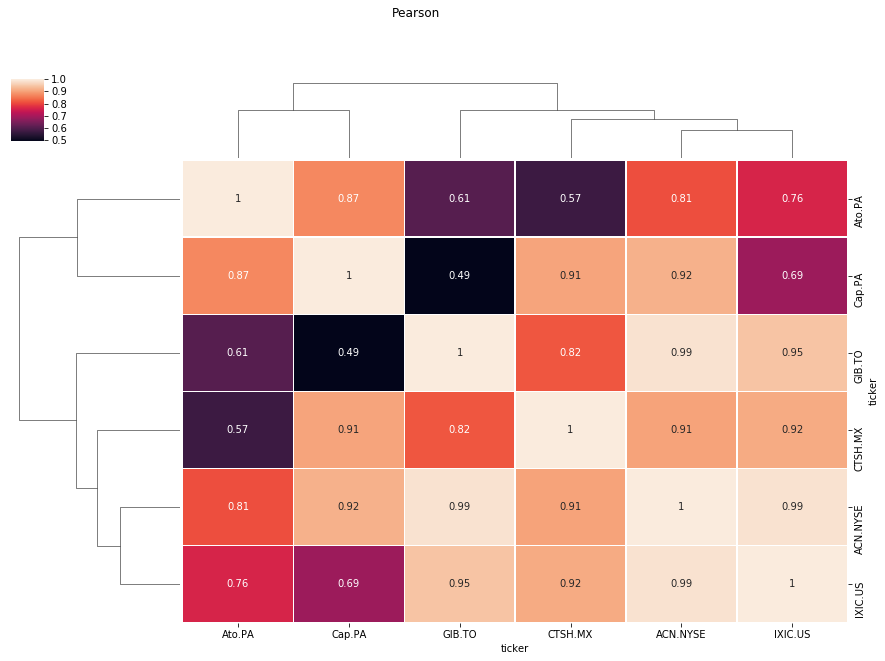

ticker    ACN.NYSE    Ato.PA    Cap.PA    GIB.TO
ticker                                          
ACN.NYSE  1.000000  0.814019  0.924900  0.986261
Ato.PA    0.814019  1.000000  0.874728  0.608956
Cap.PA    0.924900  0.874728  1.000000  0.498448
GIB.TO    0.986261  0.608956  0.498448  1.000000


In [179]:
#créer une matrice de corrélation de type Spearman (rang)
consultStocks_corr1 = consultStocks_graph1.corr(method='spearman')


# représenter la matrice en graphique type 'heatmap'
graph = sns.clustermap(consultStocks_corr1, annot=True, annot_kws={"size": 10}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
graph.fig.suptitle('Spearman')
plt.show()
print(consultStocks_corr)
#créer une matrice de corrélation de type Pearson (rang)
consultStocks_corr1 = consultStocks_graph1.corr(method='pearson')


# représenter la matrice en graphique type 'heatmap'
graph1 = sns.clustermap(consultStocks_corr1, annot=True, annot_kws={"size": 10}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
graph1.fig.suptitle('Pearson')
plt.show()
print(consultStocks_corr)